## Importing necessary libaries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer, InterclusterDistance
import math

In [2]:
%matplotlib inline

## Data Preprocessing

In [3]:
data=pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-01-21/spotify_songs.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

In [5]:
data.drop_duplicates(subset = ['track_id'], inplace = True)
data.dropna(axis = 0, inplace = True)
data.reset_index(inplace = True, drop = True)

print('There are {} rows of data in this dataset.'.format(len(data)))

There are 28352 rows of data in this dataset.


In [6]:
data['duration_min'] = data['duration_ms'] / 60000
data.drop('duration_ms', axis = 1, inplace = True)

In [7]:
data.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_min
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,3.245900
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,2.710000
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,2.943600
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,2.818217
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,3.150867


In [8]:
px.histogram(data['playlist_genre'], color_discrete_sequence = ['skyblue'])

In [9]:
data_genre = data['playlist_genre'].value_counts()

fig = px.pie(data_genre,
             names = data_genre.index,
             values = data_genre.values,
             title = 'Genre Distribution',
             hole = 0.25,
             color = data_genre.index,
             color_discrete_map={'pop':'lightcyan',
                                 'rap':'cyan',
                                 'rock':'royalblue',
                                 'latin':'darkblue',
                                 'r&b': 'midnightblue',
                                 'edm':'navy'}
          )  

fig.update_traces(textposition = 'inside', textinfo = 'percent+label')

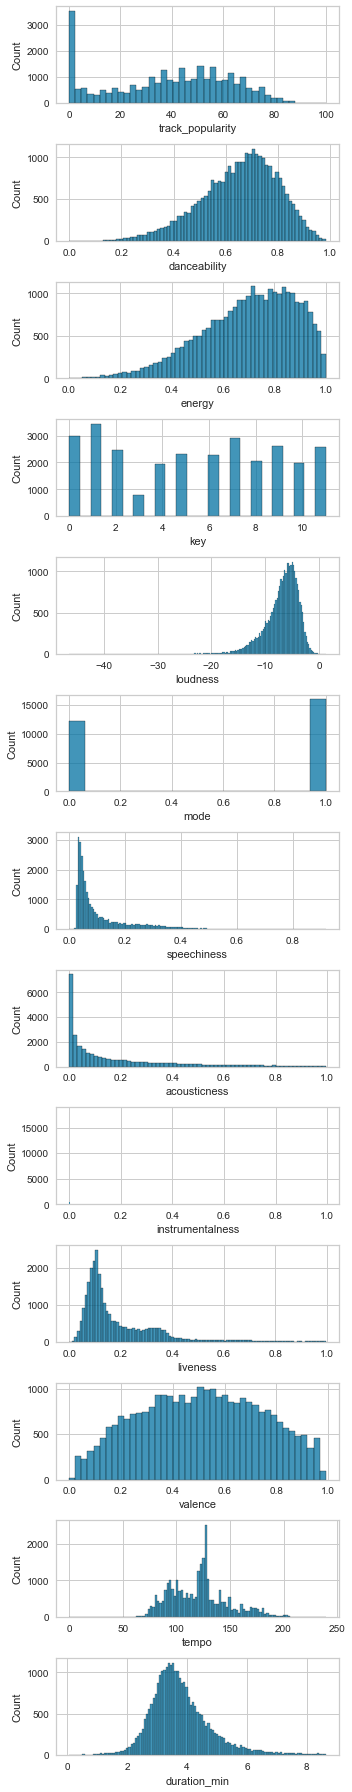

In [10]:
columns_list = [*data.columns]
visualize_cols = []

for i in range(len(columns_list)):
    
    if data[columns_list[i]].dtype != 'O':
        visualize_cols.append(columns_list[i])
    else :
        pass
    
visualize_df = data[visualize_cols]

fig, axes = plt.subplots(nrows = len(visualize_cols), ncols = 1, figsize = (5,25))

for j in range(len(visualize_cols)):
    hist = sns.histplot(data = visualize_df, x = visualize_df.iloc[:,j], ax = axes[j])
    
plt.tight_layout()

## Feature Scaling and Normalization

In [11]:
numeric_set = data[visualize_cols]

scaler = StandardScaler()
x_scaled = scaler.fit_transform(numeric_set)
df = pd.DataFrame(x_scaled, columns = numeric_set.columns)
df.head()

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_min
0,1.125138,0.649057,1.185948,0.175052,1.377883,0.876494,-0.484071,-0.337471,-0.391856,-0.806073,0.032493,0.039986,-0.520964
1,1.167334,0.498153,0.635555,1.558684,0.608875,0.876494,-0.688858,-0.470319,-0.373753,1.065178,0.779272,-0.778593,-1.047386
2,1.293922,0.148330,1.267690,-1.208579,1.115070,-1.140909,-0.329017,-0.438902,-0.391756,-0.519323,0.437888,0.113148,-0.817917
3,0.871963,0.443279,1.262240,0.451779,1.001119,0.876494,-0.057918,-0.666450,-0.391816,0.083685,-0.995928,0.037018,-0.941083
4,1.251726,-0.023151,0.733645,-1.208579,0.706689,0.876494,-0.702510,-0.434863,-0.391856,-0.690604,0.915826,0.111960,-0.614317


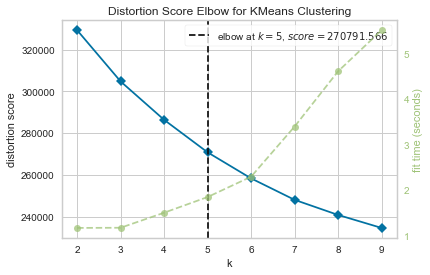

In [12]:
model = KMeans(random_state = 1, n_init = 20)  
visualizer = KElbowVisualizer(model, k=(2,10))  
visualizer.fit(df)
visualizer.show()
plt.show()

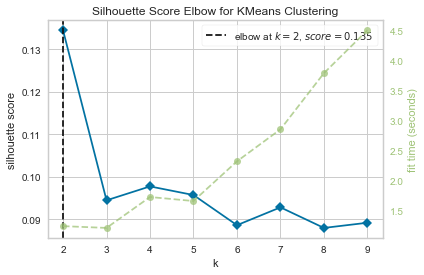

In [13]:
model = KMeans(random_state = 1, n_init = 20)  
visualizer = KElbowVisualizer(model, k=(2,10), metric = 'silhouette')
visualizer.fit(df)
visualizer.show()
plt.show()

In [14]:
k = 5
model = KMeans(n_clusters = k, n_init = 20, random_state = 12)
model.fit(df)

KMeans(n_clusters=5, n_init=20, random_state=12)

In [15]:
labels = model.predict(df)
labels[:5]

array([1, 1, 1, 0, 1])

In [16]:
pd.Series(labels).value_counts().sort_index()

0     7692
1    10015
2     2390
3     4005
4     4250
dtype: int64

<AxesSubplot:>

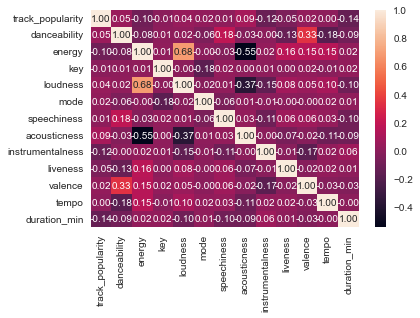

In [17]:
sns.heatmap(data[visualize_cols].corr(), annot = True, fmt = '.2f')

### Using PCA

In [18]:
pca2 = PCA(n_components = 2)
pca2features = pca2.fit_transform(numeric_set)
pca2.explained_variance_ratio_

array([0.55386681, 0.42808253])

In [19]:
pca2features.shape

(28352, 2)

In [20]:
PCA1 = pca2.components_[0].reshape(-1,1)
PCA2 = pca2.components_[1].reshape(-1,1)

print(PCA1.shape, PCA2.shape)

(13, 1) (13, 1)


In [21]:
numeric_set.head()

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_min
0,66,0.748,0.916,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,3.245900
1,67,0.726,0.815,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,2.710000
2,70,0.675,0.931,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,2.943600
3,60,0.718,0.930,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,2.818217
4,69,0.650,0.833,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,3.150867


In [22]:
PCA1_array = np.zeros(len(numeric_set))
PCA2_array = np.zeros(len(numeric_set))

for index, row in numeric_set.iterrows():
    
    row_array = row.values.reshape(1,-1)
    PCA1_array[index] = np.matmul(row_array, PCA1)
    PCA2_array[index] = np.matmul(row_array, PCA2)
        
print(PCA1_array.shape)    

(28352,)


In [23]:
PCA_df = pd.DataFrame(data = {'PCA1': PCA1_array, 'PCA2': PCA2_array})
PCA_df.head()

,PCA1,PCA2
0,-123.088804,63.879692
1,-101.013290,65.240158
2,-125.126114,67.849293
3,-122.893503,57.877994
4,-125.063627,66.843471


In [24]:
k = 5
model1 = KMeans(n_clusters = k, n_init = 50, random_state = 12)
model1.fit(PCA_df)
labels = model1.predict(PCA_df)

In [25]:
PCA_df['KMeans'] = labels
PCA_df.head()

,PCA1,PCA2,KMeans
0,-123.088804,63.879692,2
1,-101.013290,65.240158,1
2,-125.126114,67.849293,2
3,-122.893503,57.877994,2
4,-125.063627,66.843471,2


In [26]:
PCA_df['KMeans'].value_counts().sort_index()

0    5554
1    6623
2    8608
3    4188
4    3379
Name: KMeans, dtype: int64

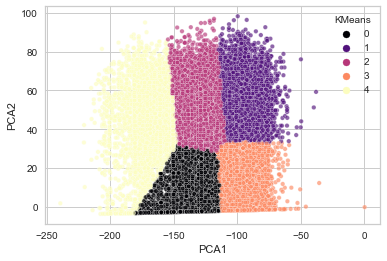

In [27]:
sns.scatterplot(data = PCA_df, x = 'PCA1', y = 'PCA2', hue = 'KMeans', s = 20, palette = 'magma', alpha = 0.65)
plt.show()

In [28]:
new_df = pd.concat([data, PCA_df], axis = 1)
new_df.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_min,PCA1,PCA2,KMeans
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,0.0583,0.1020,0.000000,0.0653,0.518,122.036,3.245900,-123.088804,63.879692,2
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,0.0373,0.0724,0.004210,0.3570,0.693,99.972,2.710000,-101.013290,65.240158,1
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,0.0742,0.0794,0.000023,0.1100,0.613,124.008,2.943600,-125.126114,67.849293,2
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,0.1020,0.0287,0.000009,0.2040,0.277,121.956,2.818217,-122.893503,57.877994,2
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,0.0359,0.0803,0.000000,0.0833,0.725,123.976,3.150867,-125.063627,66.843471,2


In [29]:
pd.options.mode.chained_assignment = None

def recommendations(data, track_name, song_count):

    """
    This function calculates the euclidian distance between
    points which are in the same cluster.
    """

    i = data[data['track_name'] == track_name].index[0]
    cluster = data['KMeans'][i]

    df = data[data['KMeans'] == cluster]
    df.reset_index(drop = True, inplace = True)
    ind = df[df['track_name'] == track_name].index[0]
    PCA = data[['PCA1','PCA2']].to_numpy()

    similarity = []
    for j in range(len(df)):
        distance = math.dist(PCA[ind], PCA[j])
        similarity.append(distance)

    df['similarity'] = similarity
    df.sort_values('similarity', inplace = True)
    df['track_id'] = df['track_id'].apply(lambda x: 'https://open.spotify.com/track/' + x)

    x = pd.DataFrame(df.iloc[1:song_count + 1, [1,2,0]].values, columns = ['Track', 'Artist', 'spotify_link'])
    # First value is the songs itself. So we skip it by starting the index 1.

    return x


recommendations(new_df, 'Memories - Dillon Francis Remix',10)     

,Track,Artist,spotify_link
0,Dream ship,DJ RYOW,https://open.spotify.com/track/3dbZ20KRvbye5m9...
1,7 Things - Single Version,Miley Cyrus,https://open.spotify.com/track/5ecZWU5uQOiCVSn...
2,Movement,Lylos,https://open.spotify.com/track/6WKynwuNv6tsxlF...
3,Así Es Amar,María León,https://open.spotify.com/track/3QmaHwaNTrqTY28...
4,Waste the Time,henrikz,https://open.spotify.com/track/3a0y6BB3cEu01Np...
5,Presente,Control Machete,https://open.spotify.com/track/3KeiwsmA8ATkmuQ...
6,I Miss Myself (with HRVY),NOTD,https://open.spotify.com/track/5YkmS18BehACOhI...
7,"New York, New York",Tha Dogg Pound,https://open.spotify.com/track/3ooAjhyOZ1xttGD...
8,Relaxa,Altamira,https://open.spotify.com/track/6vVqy8Tn3l2yJqB...
9,Solo (feat. Demi Lovato),Clean Bandit,https://open.spotify.com/track/3NuK5xMlSlB6K2Q...


In [30]:
songs=recommendations(new_df, 'Memories - Dillon Francis Remix',10)     

In [31]:
songs.head()

,Track,Artist,spotify_link
0,Dream ship,DJ RYOW,https://open.spotify.com/track/3dbZ20KRvbye5m9...
1,7 Things - Single Version,Miley Cyrus,https://open.spotify.com/track/5ecZWU5uQOiCVSn...
2,Movement,Lylos,https://open.spotify.com/track/6WKynwuNv6tsxlF...
3,Así Es Amar,María León,https://open.spotify.com/track/3QmaHwaNTrqTY28...
4,Waste the Time,henrikz,https://open.spotify.com/track/3a0y6BB3cEu01Np...


In [37]:
songs.spotify_link[:10]

0    https://open.spotify.com/track/3dbZ20KRvbye5m9...
1    https://open.spotify.com/track/5ecZWU5uQOiCVSn...
2    https://open.spotify.com/track/6WKynwuNv6tsxlF...
3    https://open.spotify.com/track/3QmaHwaNTrqTY28...
4    https://open.spotify.com/track/3a0y6BB3cEu01Np...
5    https://open.spotify.com/track/3KeiwsmA8ATkmuQ...
6    https://open.spotify.com/track/5YkmS18BehACOhI...
7    https://open.spotify.com/track/3ooAjhyOZ1xttGD...
8    https://open.spotify.com/track/6vVqy8Tn3l2yJqB...
9    https://open.spotify.com/track/3NuK5xMlSlB6K2Q...
Name: spotify_link, dtype: object

In [ ]:
 streamlit run c:\Users\cinar\Desktop\spotify\streamlit_app\Homepage.py

Memories - Dillon Francis Remix

In [ ]:
#new_df.to_csv('last.csv', index=False)